In [1]:
%cd ..

/home/lab-admin/Code/vr-exoskeleton


/home/lab-admin/Code/vr-exoskeleton/venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# evaluate

In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from vr_exoskeleton import data_utils

## Load predictions

In [3]:
window_size = 3
stamp = 1717450374

users, X, Y, Y_hat = (np.load(f'eval_{stamp:d}_{suffix}.npy')
                      for suffix in ['users', 'input', 'head_actual', 'head_predicted'])
print(users)
X.shape, Y.shape, Y_hat.shape

['User12' 'User18' 'User20' 'User7' 'User5' 'User4' 'User13' 'User15']


((1036606, 27), (1036606, 3), (1036606, 3))

In [4]:
# 'User20' happens to have 2 fewer total frames than everyone else...
abs(len(users) * 4 * data_utils.N_TRIALS * (10801 - window_size) - X.shape[0]) <= 2

True

In [5]:
for i in range(3):
    print(f'context window index: {i:>3d}')
    for w in range(window_size):
        print(X[i, 9 * w:9 * w + 6], end=' ')
        print(X[i, 9 * w + 6:9 * w + 9])
    print()

context window index:   0
[0.05273438 0.04382324 0.9976349  0.04872131 0.02706909 0.9984436 ] [-0.06769766  0.2502271   0.9658175 ]
[0.05725098 0.03736877 0.9976501  0.05311584 0.02722168 0.9982147 ] [-0.06985345  0.2568225   0.9639308 ]
[0.05809021 0.03793335 0.9975891  0.05299377 0.02137756 0.9983521 ] [-0.0717453  0.2617896  0.9624546]

context window index:   1
[0.05725098 0.03736877 0.9976501  0.05311584 0.02722168 0.9982147 ] [-0.06985345  0.2568225   0.9639308 ]
[0.05809021 0.03793335 0.9975891  0.05299377 0.02137756 0.9983521 ] [-0.0717453  0.2617896  0.9624546]
[0.05476379 0.02455139 0.9981842  0.04920959 0.03019714 0.9983215 ] [-0.0717453  0.2617896  0.9624546]

context window index:   2
[0.05809021 0.03793335 0.9975891  0.05299377 0.02137756 0.9983521 ] [-0.0717453  0.2617896  0.9624546]
[0.05476379 0.02455139 0.9981842  0.04920959 0.03019714 0.9983215 ] [-0.0717453  0.2617896  0.9624546]
[0.05770874 0.02661133 0.9979706  0.04966736 0.02415466 0.9984589 ] [-0.07331979  0.266

In [6]:
Y[:10]

array([[-0.0717453 ,  0.2617896 ,  0.9624546 ],
       [-0.07331979,  0.2661417 ,  0.9611414 ],
       [-0.074881  ,  0.2699828 ,  0.959949  ],
       [-0.07600588,  0.2738684 ,  0.9587592 ],
       [-0.07600588,  0.2738684 ,  0.9587592 ],
       [-0.07704581,  0.2766457 ,  0.9578785 ],
       [-0.07775722,  0.2796526 ,  0.9569474 ],
       [-0.07840999,  0.2820607 ,  0.9561871 ],
       [-0.07840999,  0.2820607 ,  0.9561871 ],
       [-0.07871594,  0.28438   ,  0.9554747 ]], dtype=float32)

In [7]:
Y_hat[:10]

array([[-0.07155207,  0.26948676,  0.9627413 ],
       [-0.07108517,  0.2672472 ,  0.9632835 ],
       [-0.07220064,  0.27108872,  0.9623501 ],
       [-0.07461101,  0.276402  ,  0.96057045],
       [-0.07558523,  0.2799036 ,  0.95940197],
       [-0.07484785,  0.27830952,  0.95979744],
       [-0.07618634,  0.2808329 ,  0.9593111 ],
       [-0.07683098,  0.2849737 ,  0.9578956 ],
       [-0.07785454,  0.287396  ,  0.9572241 ],
       [-0.07717901,  0.28605932,  0.95740545]], dtype=float32)

## Plot trajectories

In [8]:
# steps = Y.shape[0]
steps = 2 ** 12
offset = 10801 * 41

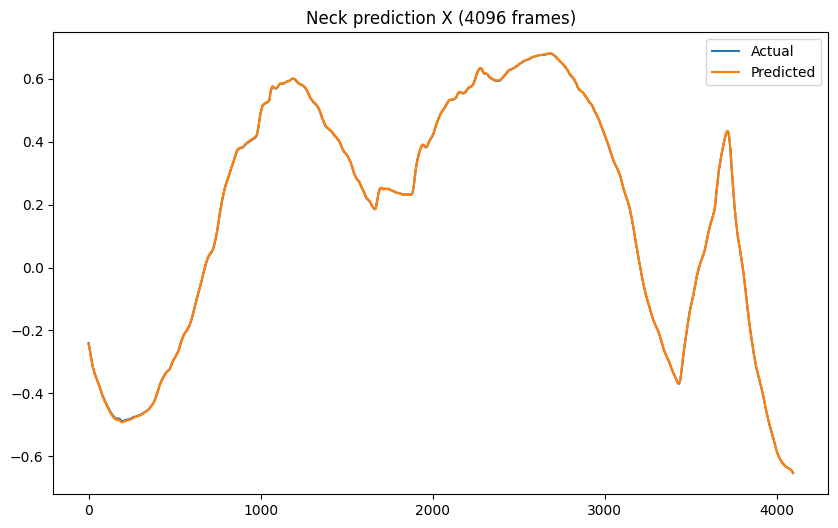

In [9]:
def plot_actual_predicted(y, y_hat, title=None):
    fig = plt.figure(figsize=(10, 6))
    plt.plot(y, label='Actual')
    plt.plot(y_hat, label='Predicted')
    if title is not None:
        plt.title(title)
    plt.legend()
    plt.show()


plot_actual_predicted(Y[offset:offset + steps, 0], Y_hat[offset:offset + steps, 0], title=f'Neck prediction X ({steps:d} frames)')

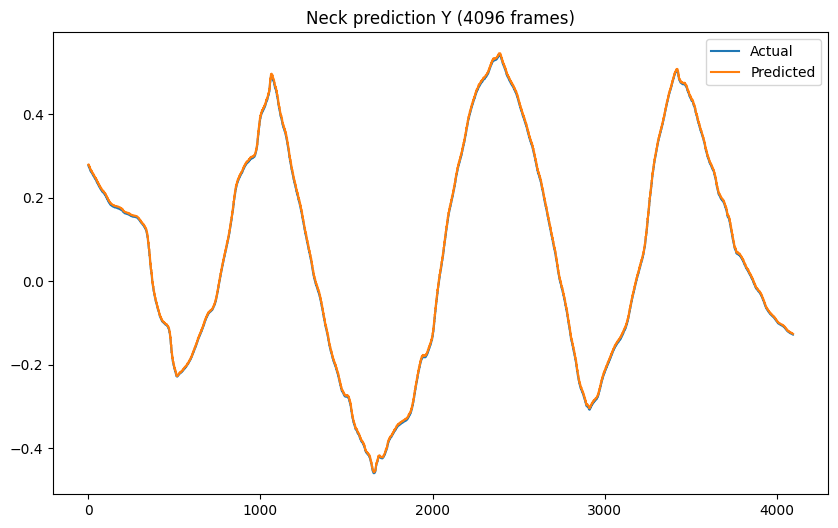

In [10]:
plot_actual_predicted(Y[offset:offset + steps, 1], Y_hat[offset:offset + steps, 1], title=f'Neck prediction Y ({steps:d} frames)')

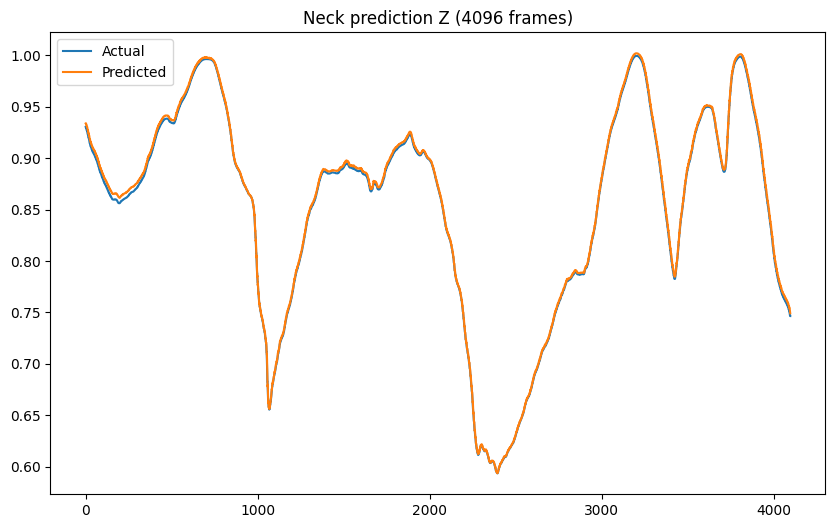

In [11]:
plot_actual_predicted(Y[offset:offset + steps, 2], Y_hat[offset:offset + steps, 2], title=f'Neck prediction Z ({steps:d} frames)')